🚀 CARGANDO Y PREPARANDO DATOS...
📊 Datos cargados: 6536 registros
🏞️ Zonas verdes disponibles: 76

🎨 CREANDO DASHBOARD INTERACTIVO MEJORADO...
✅ Dashboard principal creado exitosamente


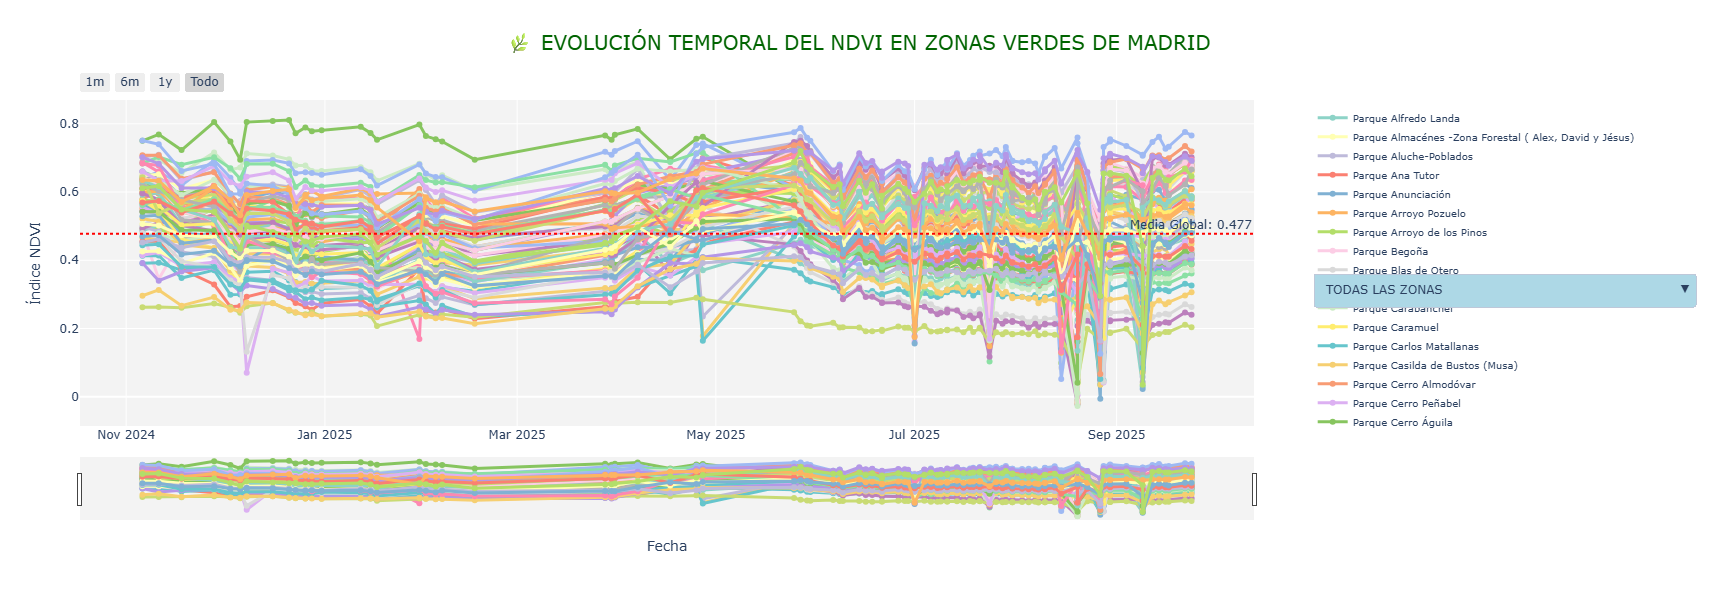


📊 CREANDO GRÁFICO DE DISTRIBUCIÓN...
✅ Gráfico de distribución creado


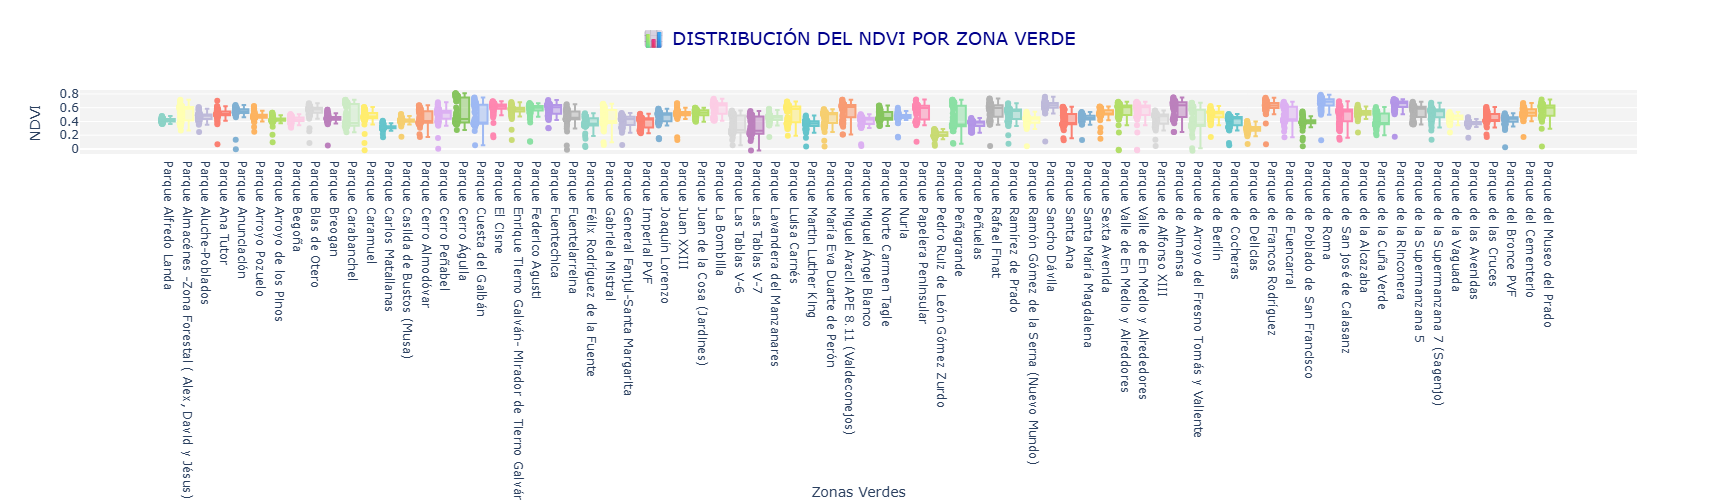


🏆 CREANDO RANKING DE ZONAS VERDES...
✅ Ranking creado


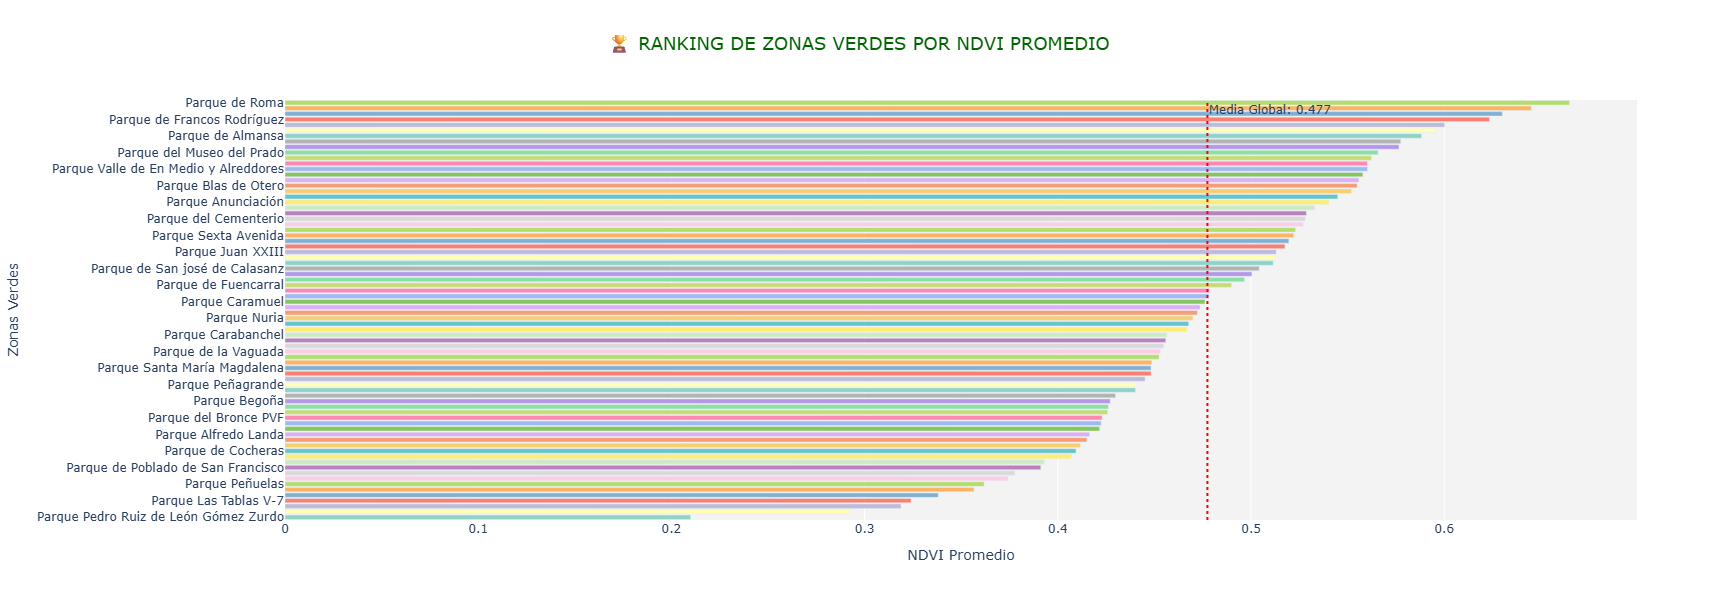


📈 ANALIZANDO TENDENCIAS TEMPORALES...
✅ Análisis de tendencias creado


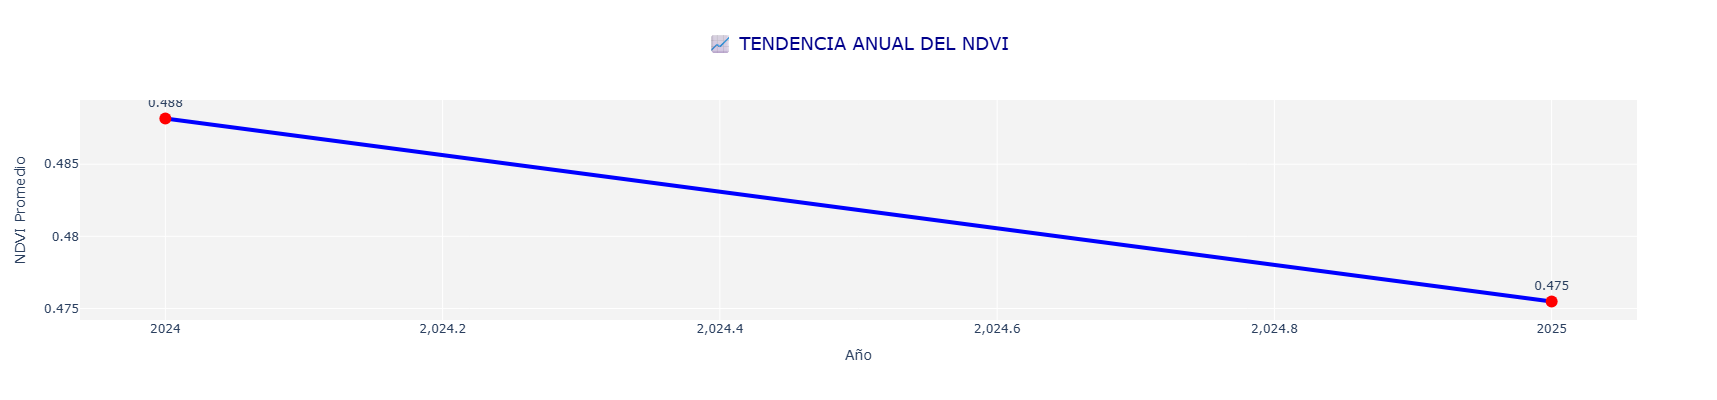


📋 RESUMEN EJECUTIVO DETALLADO
🏆 TOP 5 ZONAS CON MEJOR NDVI:
   1. Parque de Roma: 0.665 (✅ EXCELENTE)
   2. Parque de la Rinconera: 0.645 (✅ EXCELENTE)
   3. Parque Sancho Dávila: 0.630 (✅ EXCELENTE)
   4. Parque de Francos Rodríguez: 0.623 (✅ EXCELENTE)
   5. Parque El Cisne: 0.600 (✅ BUENO)

⚠️  ZONAS QUE REQUIEREN ATENCIÓN (NDVI < 0.477):
   1. Parque Caramuel: 0.476
   2. Parque Cuesta del Galbán: 0.474
   3. Parque Aluche-Poblados: 0.472
   4. Parque Nuria: 0.470
   5. Parque Joaquín Lorenzo: 0.468
   6. Parque Fuentelarreina: 0.467
   7. Parque Carabanchel: 0.456
   8. Parque María Eva Duarte de Perón: 0.456
   9. Parque Gabriela Mistral: 0.455
   10. Parque de la Vaguada: 0.453
   11. Parque Cerro Almodóvar: 0.452
   12. Parque Lavandera del Manzanares: 0.449
   13. Parque Santa María Magdalena: 0.448
   14. Parque de las Cruces: 0.448
   15. Parque Breogan: 0.445
   16. Parque Peñagrande: 0.441
   17. Parque de Alfonso XIII: 0.440
   18. Parque Santa Ana: 0.430
   19. Parque B

In [12]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from datetime import datetime

print("🚀 CARGANDO Y PREPARANDO DATOS...")
print("=" * 50)

# Cargar datos desde GitHub
url = "https://raw.githubusercontent.com/forest-scanner/ndvi_zonas_verdes/main/combinado_tiempo.csv"
df = pd.read_csv(url)

# Preparar datos
df['fecha'] = pd.to_datetime(df['system:time_start'], format='%b %d, %Y')
df = df.rename(columns={'0': 'NDVI'})
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['mes_año'] = df['fecha'].dt.to_period('M').astype(str)

# Ordenar por fecha
df = df.sort_values('fecha')

print(f"📊 Datos cargados: {len(df)} registros")
print(f"🏞️ Zonas verdes disponibles: {df['carpeta'].nunique()}")

# =============================================================================
# SOLUCIÓN SIMPLIFICADA Y CORREGIDA
# =============================================================================

print("\n🎨 CREANDO DASHBOARD INTERACTIVO MEJORADO...")

# Crear una figura principal más simple pero efectiva
fig = go.Figure()

# Obtener lista única de zonas verdes
zonas_verdes = sorted(df['carpeta'].unique())
colores = px.colors.qualitative.Set3 + px.colors.qualitative.Pastel

# Añadir una traza para cada zona verde
for i, zona in enumerate(zonas_verdes):
    df_zona = df[df['carpeta'] == zona]
    
    fig.add_trace(
        go.Scatter(
            x=df_zona['fecha'],
            y=df_zona['NDVI'],
            name=zona,
            mode='lines+markers',
            line=dict(width=3, color=colores[i % len(colores)]),
            marker=dict(size=6),
            hovertemplate=(
                f"<b>{zona}</b><br>"
                "Fecha: %{x|%b %Y}<br>"
                "NDVI: %{y:.3f}<br>"
                "<extra></extra>"
            ),
            visible=True
        )
    )

# Añadir línea de media global
media_global = df['NDVI'].mean()
fig.add_hline(
    y=media_global, 
    line_dash="dot", 
    line_color="red", 
    annotation_text=f"Media Global: {media_global:.3f}",
    annotation_font_size=12
)

# Crear botones para seleccionar zonas
buttons = []

# Botón para mostrar todas
buttons.append(
    dict(
        label="TODAS LAS ZONAS",
        method="update",
        args=[{"visible": [True] * len(fig.data)}]
    )
)

# Botones individuales para cada zona
for i, zona in enumerate(zonas_verdes):
    # Crear lista de visibilidad: True solo para la zona actual
    visibility = [False] * len(fig.data)
    visibility[i] = True  # Solo mostrar la zona actual
    
    buttons.append(
        dict(
            label=zona,
            method="update",
            args=[{"visible": visibility}]
        )
    )

# Actualizar layout
fig.update_layout(
    title=dict(
        text="🌿 EVOLUCIÓN TEMPORAL DEL NDVI EN ZONAS VERDES DE MADRID",
        x=0.5,
        font=dict(size=20, color='darkgreen')
    ),
    xaxis_title="Fecha",
    yaxis_title="Índice NDVI",
    height=600,
    showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.05,
        bgcolor='rgba(255,255,255,0.9)',
        font=dict(size=10)
    ),
    updatemenus=[
        dict(
            type="dropdown",
            direction="down",
            x=1.05,
            y=0.5,
            buttons=buttons,
            pad={"r": 10, "t": 10},
            showactive=True,
            xanchor="left",
            yanchor="top",
            bgcolor='lightblue'
        )
    ],
    hovermode='closest',
    plot_bgcolor='rgba(240,240,240,0.8)'
)

# Añadir controles de rango temporal
fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all", label="Todo")
        ])
    ),
    rangeslider=dict(visible=True),
    type="date"
)

print("✅ Dashboard principal creado exitosamente")
fig.show()

# =============================================================================
# GRÁFICO DE DISTRIBUCIÓN POR ZONA VERDE
# =============================================================================

print("\n📊 CREANDO GRÁFICO DE DISTRIBUCIÓN...")

fig_distribucion = go.Figure()

for i, zona in enumerate(zonas_verdes):
    df_zona = df[df['carpeta'] == zona]
    
    fig_distribucion.add_trace(
        go.Box(
            y=df_zona['NDVI'],
            name=zona,
            marker_color=colores[i % len(colores)],
            boxpoints='all',  # Muestra todos los puntos
            jitter=0.3,
            pointpos=-1.8,
            hovertemplate=(
                f"<b>{zona}</b><br>"
                "NDVI: %{y:.3f}<br>"
                "<extra></extra>"
            )
        )
    )

fig_distribucion.update_layout(
    title=dict(
        text="📊 DISTRIBUCIÓN DEL NDVI POR ZONA VERDE",
        x=0.5,
        font=dict(size=18, color='darkblue')
    ),
    xaxis_title="Zonas Verdes",
    yaxis_title="NDVI",
    height=500,
    showlegend=False,
    plot_bgcolor='rgba(240,240,240,0.8)'
)

print("✅ Gráfico de distribución creado")
fig_distribucion.show()

# =============================================================================
# GRÁFICO DE COMPARACIÓN - BARRAS HORIZONTALES
# =============================================================================

print("\n🏆 CREANDO RANKING DE ZONAS VERDES...")

# Calcular promedios por zona
ndvi_promedio = df.groupby('carpeta')['NDVI'].mean().sort_values(ascending=True)

fig_ranking = go.Figure()

for i, (zona, valor) in enumerate(ndvi_promedio.items()):
    color_idx = list(ndvi_promedio.index).index(zona) % len(colores)
    
    fig_ranking.add_trace(
        go.Bar(
            y=[zona],
            x=[valor],
            orientation='h',
            marker_color=colores[color_idx],
            hovertemplate=(
                f"<b>{zona}</b><br>"
                "NDVI Promedio: %{x:.3f}<br>"
                f"Posición: {i+1} de {len(ndvi_promedio)}<br>"
                "<extra></extra>"
            ),
            name=zona
        )
    )

fig_ranking.update_layout(
    title=dict(
        text="🏆 RANKING DE ZONAS VERDES POR NDVI PROMEDIO",
        x=0.5,
        font=dict(size=18, color='darkgreen')
    ),
    xaxis_title="NDVI Promedio",
    yaxis_title="Zonas Verdes",
    height=600,
    showlegend=False,
    plot_bgcolor='rgba(240,240,240,0.8)'
)

# Añadir línea de media global
fig_ranking.add_vline(
    x=media_global, 
    line_dash="dot", 
    line_color="red",
    annotation_text=f"Media Global: {media_global:.3f}"
)

print("✅ Ranking creado")
fig_ranking.show()

# =============================================================================
# ANÁLISIS DE TENDENCIAS
# =============================================================================

print("\n📈 ANALIZANDO TENDENCIAS TEMPORALES...")

# Crear gráfico de tendencia anual
ndvi_anual = df.groupby('año')['NDVI'].mean().reset_index()

fig_tendencia = go.Figure()

fig_tendencia.add_trace(
    go.Scatter(
        x=ndvi_anual['año'],
        y=ndvi_anual['NDVI'],
        mode='lines+markers+text',
        line=dict(width=4, color='blue'),
        marker=dict(size=12, color='red'),
        text=ndvi_anual['NDVI'].round(3),
        textposition="top center",
        name="NDVI Promedio Anual",
        hovertemplate=(
            "Año: %{x}<br>"
            "NDVI Promedio: %{y:.3f}<br>"
            "<extra></extra>"
        )
    )
)

fig_tendencia.update_layout(
    title=dict(
        text="📈 TENDENCIA ANUAL DEL NDVI",
        x=0.5,
        font=dict(size=18, color='darkblue')
    ),
    xaxis_title="Año",
    yaxis_title="NDVI Promedio",
    height=400,
    plot_bgcolor='rgba(240,240,240,0.8)'
)

print("✅ Análisis de tendencias creado")
fig_tendencia.show()

# =============================================================================
# RESUMEN EJECUTIVO MEJORADO
# =============================================================================

print("\n📋 RESUMEN EJECUTIVO DETALLADO")
print("=" * 60)

# Calcular estadísticas detalladas
estadisticas = df.groupby('carpeta').agg({
    'NDVI': ['mean', 'std', 'min', 'max', 'count'],
    'fecha': ['min', 'max']
}).round(3)

estadisticas.columns = ['NDVI_Promedio', 'Desviación', 'Mínimo', 'Máximo', 'N_Registros', 'Fecha_Inicio', 'Fecha_Fin']
estadisticas = estadisticas.sort_values('NDVI_Promedio', ascending=False)

print("🏆 TOP 5 ZONAS CON MEJOR NDVI:")
for i, (zona, fila) in enumerate(estadisticas.head(5).iterrows(), 1):
    estado = "✅ EXCELENTE" if fila['NDVI_Promedio'] > 0.6 else "✅ BUENO" if fila['NDVI_Promedio'] > media_global else "⚠️  REGULAR"
    print(f"   {i}. {zona}: {fila['NDVI_Promedio']:.3f} ({estado})")

print(f"\n⚠️  ZONAS QUE REQUIEREN ATENCIÓN (NDVI < {media_global:.3f}):")
zonas_bajas = estadisticas[estadisticas['NDVI_Promedio'] < media_global]
for i, (zona, fila) in enumerate(zonas_bajas.iterrows(), 1):
    print(f"   {i}. {zona}: {fila['NDVI_Promedio']:.3f}")

print(f"\n📊 ESTADÍSTICAS GLOBALES:")
print(f"   • NDVI Promedio Global: {media_global:.3f}")
print(f"   • Rango Global: {df['NDVI'].min():.3f} - {df['NDVI'].max():.3f}")
print(f"   • Desviación Estándar: {df['NDVI'].std():.3f}")
print(f"   • Total de Zonas Analizadas: {len(zonas_verdes)}")
print(f"   • Total de Registros: {len(df)}")
print(f"   • Período de Análisis: {df['fecha'].min().strftime('%d/%m/%Y')} - {df['fecha'].max().strftime('%d/%m/%Y')}")

# Análisis de tendencias por zona
print(f"\n📈 ANÁLISIS DE TENDENCIAS POR ZONA:")
for zona in zonas_verdes[:5]:  # Mostrar solo las primeras 5 para no saturar
    df_zona = df[df['carpeta'] == zona].sort_values('fecha')
    if len(df_zona) > 1:
        primer_valor = df_zona['NDVI'].iloc[0]
        ultimo_valor = df_zona['NDVI'].iloc[-1]
        cambio = ultimo_valor - primer_valor
        tendencia = "📈 MEJORANDO" if cambio > 0.01 else "📉 EMPEORANDO" if cambio < -0.01 else "➡️ ESTABLE"
        print(f"   • {zona}: {tendencia} (Δ = {cambio:+.3f})")

print(f"\n🎯 RECOMENDACIONES PRIORITARIAS:")
print(f"   1. Intervenir en zonas con NDVI < {media_global:.3f}")
print(f"   2. Replicar buenas prácticas de zonas con NDVI > 0.6")
print(f"   3. Monitorear zonas con alta variabilidad (desviación > 0.1)")
print(f"   4. Realizar análisis estacional para identificar patrones")

print(f"\n💡 INSTRUCCIONES DE USO:")
print(f"   • Usa el dropdown para seleccionar zonas específicas")
print(f"   • Haz zoom en áreas de interés con el selector de rango")
print(f"   • Compara distribuciones en el gráfico de cajas")
print(f"   • Consulta el ranking para priorizar intervenciones")

print("\n✅ ANÁLISIS COMPLETADO - DASHBOARD LISTO PARA TOMA DE DECISIONES")